In [1]:
import pybamm
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.DFN(options={
    "open circuit potential": "current sigmoid",
    "SEI": "interstitial-diffusion limited",
    "SEI porosity change": "true",
    "particle mechanics": "constant cracks",
    "SEI on cracks": "true",
})

param = pybamm.ParameterValues("OKane2023")
param.update({"Initial concentration in negative electrode [mol.m-3]": 29335})
param.update({"Initial inner SEI thickness [m]": 2.5e-9})
param.update({"Initial outer SEI thickness [m]": 2.5e-9})
param.update({"Inner SEI lithium interstitial diffusivity [m2.s-1]": 2e-20})

exp95 = pybamm.Experiment(["Discharge at C/10 for 30 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim95 = pybamm.Simulation(model, parameter_values=param, experiment=exp95)
sol95 = sim95.solve()
exp90 = pybamm.Experiment(["Discharge at C/10 for 60 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim90 = pybamm.Simulation(model, parameter_values=param, experiment=exp90)
sol90 = sim90.solve()
exp85 = pybamm.Experiment(["Discharge at C/10 for 90 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim85 = pybamm.Simulation(model, parameter_values=param, experiment=exp85)
sol85 = sim85.solve()
exp80 = pybamm.Experiment(["Discharge at C/10 for 120 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim80 = pybamm.Simulation(model, parameter_values=param, experiment=exp80)
sol80 = sim80.solve()
exp70 = pybamm.Experiment(["Discharge at C/10 for 180 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim70 = pybamm.Simulation(model, parameter_values=param, experiment=exp70)
sol70 = sim70.solve()
exp60 = pybamm.Experiment(["Discharge at C/10 for 240 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp60)
sol60 = sim60.solve()
exp50 = pybamm.Experiment(["Discharge at C/10 for 300 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim50 = pybamm.Simulation(model, parameter_values=param, experiment=exp50)
sol50 = sim50.solve()
exp30 = pybamm.Experiment(["Discharge at C/10 for 420 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp30)
sol30 = sim30.solve()
exp20 = pybamm.Experiment(["Discharge at C/10 for 480 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim20 = pybamm.Simulation(model, parameter_values=param, experiment=exp20)
sol20 = sim20.solve()
exp10 = pybamm.Experiment(["Discharge at C/10 for 540 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim10 = pybamm.Simulation(model, parameter_values=param, experiment=exp10)
sol10 = sim10.solve()
exp5 = pybamm.Experiment(["Discharge at C/10 for 570 minutes (30 minute period)", "Rest for 13104 hours (4 hour period)"])
sim5 = pybamm.Simulation(model, parameter_values=param, experiment=exp5)
sol5 = sim5.solve()
#exp0 = pybamm.Experiment(["Discharge at C/10 until 2.5 V (30 minute period)", "Rest for 13104 hours (4 hour period)"])
#sim0 = pybamm.Simulation(model, parameter_values=param, experiment=exp0)
#sol0 = sim0.solve()

In [3]:
t95 = sol95["Time [s]"].entries/604800
Q95 = sol95["Total capacity lost to side reactions [A.h]"].entries
t90 = sol90["Time [s]"].entries/604800
Q90 = sol90["Total capacity lost to side reactions [A.h]"].entries
t85 = sol85["Time [s]"].entries/604800
Q85 = sol85["Total capacity lost to side reactions [A.h]"].entries
t80 = sol80["Time [s]"].entries/604800
Q80 = sol80["Total capacity lost to side reactions [A.h]"].entries
t70 = sol70["Time [s]"].entries/604800
Q70 = sol70["Total capacity lost to side reactions [A.h]"].entries
t60 = sol60["Time [s]"].entries/604800
Q60 = sol60["Total capacity lost to side reactions [A.h]"].entries
t50 = sol50["Time [s]"].entries/604800
Q50 = sol50["Total capacity lost to side reactions [A.h]"].entries
t30 = sol30["Time [s]"].entries/604800
Q30 = sol30["Total capacity lost to side reactions [A.h]"].entries
t20 = sol20["Time [s]"].entries/604800
Q20 = sol20["Total capacity lost to side reactions [A.h]"].entries
t10 = sol10["Time [s]"].entries/604800
Q10 = sol10["Total capacity lost to side reactions [A.h]"].entries
t5 = sol5["Time [s]"].entries/604800
Q5 = sol5["Total capacity lost to side reactions [A.h]"].entries
#t0 = sol0["Time [s]"].entries/604800
#Q0 = sol0["Total capacity lost to side reactions [A.h]"].entries

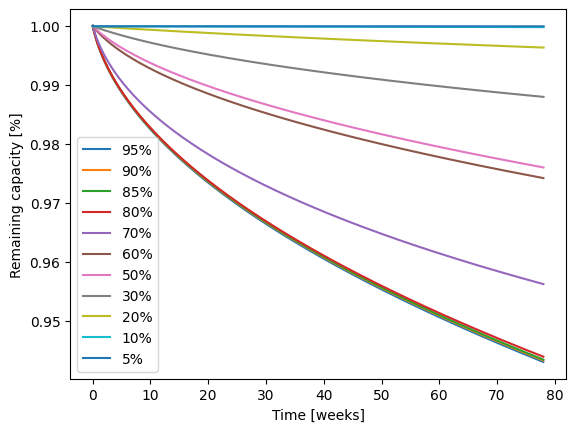

In [4]:
plt.figure()
plt.plot(t95,1-Q95/5,label="95%")
plt.plot(t90,1-Q90/5,label="90%")
plt.plot(t85,1-Q85/5,label="85%")
plt.plot(t80,1-Q80/5,label="80%")
plt.plot(t70,1-Q70/5,label="70%")
plt.plot(t60,1-Q60/5,label="60%")
plt.plot(t50,1-Q50/5,label="50%")
plt.plot(t30,1-Q30/5,label="30%")
plt.plot(t20,1-Q20/5,label="20%")
plt.plot(t10,1-Q10/5,label="10%")
plt.plot(t5,1-Q5/5,label="5%")
#plt.plot(t0,1-Q0/4.86491,label="0%")
plt.xlabel("Time [weeks]")
plt.ylabel("Remaining capacity [%]")
plt.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/validation_data/WMG calendar ageing/DLiI_2E-20_5Ah.png")
plt.show()